In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
def loadData(fileName):
    data = np.loadtxt(fileName, delimiter=",", skiprows=1)
    return (data[:, 0], data[:, 1])
    

In [3]:
X_train, Y_train = loadData("train.csv")

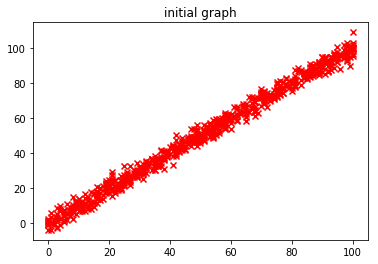

In [4]:
plt.scatter(X_train, Y_train, marker = 'x', color='r')
plt.title("initial graph")
plt.show()

In [5]:
#Starting Tensorflow

#Setting Paramaters
learning_rate = .0001
learning_epochs = 50

def model(X, w):
    return tf.add(w[0], tf.multiply(X, w[1]))

X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)
m = Y_train.size
w = tf.Variable([0.0, 0.0], name="weights")
y_model = model(X, w)
cost = tf.square(Y - y_model)

train_op = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)


In [6]:
#applying Regression
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

for epoch in range(learning_epochs):
    for(x, y) in zip(X_train, Y_train):
        sess.run(train_op, {X: x, Y: y})

w_val = sess.run(w)
print(w_val)
sess.close()

[-0.06021365  0.97707468]


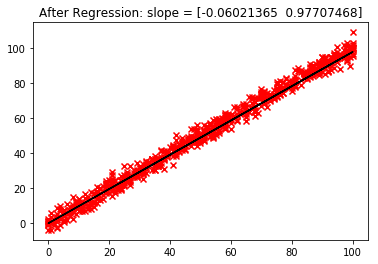

In [8]:
m = Y_train.size
#y_learned = np.matmul(np.hstack((np.ones(m).reshape(m, 1), X_train.reshape(m, 1))) , w_val) multiparameters
y_learned = w_val[0] +X_train * w_val[1]
plt.scatter(X_train, Y_train, marker = 'x', color='r')
plt.plot(X_train, y_learned, color='black', markersize=5)
plt.title("After Regression: slope = " + str(w_val))
plt.show()


In [9]:
#Cost on test Data

np.sqrt(np.sum(np.square(Y_train-y_learned)/y_learned.size))

3.1023304863053882

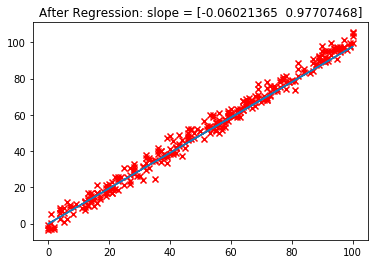

In [11]:
#test Data

X_train, Y_train = loadData("test.csv")

y_learned = w_val[0] + X_train * w_val[1]

plt.scatter(X_train, Y_train, marker = 'x', color='r')
plt.plot(X_train, y_learned)
plt.title("After Regression: slope = " + str(w_val))
plt.show()

In [12]:
#Cost on test Data

np.sqrt(np.sum(np.square(Y_train-y_learned)/y_learned.size))

3.539432988419291